<a href="https://colab.research.google.com/github/mayuneko-re/notebook/blob/master/Buckley_Leverett_Basic_Sensitivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 水-油置換問題の感度解析（Buckley-Leverettによる解法）

Version 0.1 (Oct. 2019)

油で満たされている多孔質媒体に対し，水を圧入し水攻する．このとき，一次元／非圧縮／非混和条件を仮定すると，Buckley-Leverettの解法により、ある時間に対する飽和率分布を解析的に求めることができる。

[Buckley-Leverett Solution for water-oil displacement problem](https://github.com/mayuneko-re/notebook/blob/master/Buckley_Leverett_Basic.ipynb)

ここでは，種々のパラメ―タによる感度を確認する。


## ライブラリのインポート

In [0]:
import sys
import numpy as np
import matplotlib.pyplot as plt

https://github.com/mayuneko-re/notebook.git にある buckley_leverett.py を使用する．

In [2]:
!rm -r notebook
!git clone https://github.com/mayuneko-re/notebook.git
sys.path.append('/content/notebook')
from buckley_leverett import BL

rm: cannot remove 'notebook': No such file or directory
Cloning into 'notebook'...
remote: Enumerating objects: 129, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (127/127), done.
remote: Total 129 (delta 53), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (129/129), 780.05 KiB | 2.43 MiB/s, done.
Resolving deltas: 100% (53/53), done.


In [3]:
help(BL)

Help on class BL in module buckley_leverett:

class BL(builtins.object)
 |  Store and calculate data for oil-water displacement problem by Buckley-Leverett Solution
 |  
 |  Attributes:
 |      muw (float): Water viscosity, cP
 |      muo (float): Oil viscosity, cP
 |      Swc (float): Connate water saturation, Vol/Vol
 |      Sor (float): Residual oil saturation, Vol/Vol
 |      krw0 (float): Water endpoint relative permeability at residual oil saturation
 |      kro0 (float): Oil endpoint relative permeability at connate water saturation
 |      nw (float): Exponent for water relative permeability
 |      no (float): Exponent for oil relative permeability
 |      label (str): Case label for plot
 |      Sw (ndarray): Water saturation
 |      Swn (ndarray): Normalized water saturation
 |      krw (ndarray): Water relative permeability
 |      kro (ndarray): Oil relative permeability
 |      fw (ndarray): Fractional flow of water
 |      fw_wSF (ndarray): Fractional flow of water with 

## 感度解析

### 感度解析用の関数

In [0]:
def sensitivity(dl):
    
    fig, ax = plt.subplots(1,4,figsize=(24, 6))
    
    for d in dl:
        bl = BL(**d)
        bl.calc()

        tD = np.linspace(start=0, stop=2, num = 100)
        
        # Plot ######
        # Relative permeability
        ax[0].plot(bl.Sw, bl.krw, label='Water for '+bl.label)
        ax[0].plot(bl.Sw, bl.kro, label='Oil for '+bl.label)
        
        # Fractional flow of water
        ax[1].plot(bl.Sw, bl.fw, label=bl.label)
        ax[1].plot(bl.Sw, bl.fw_wSF, 'k:')

        # Saturation profile at specific time
        xD, Sw = bl.get_Sw_profile(tD=0.1)
        ax[2].plot(xD, Sw, label=bl.label)

        # Oil recovery
        ax[3].plot(tD, bl.get_oil_RF(tD), label=bl.label)


    def adjust_ax(ax, xlabel=None, ylabel=None, xlim=(0,1), ylim=(0,1)):
        ax.legend()
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)
        ax.set_xlim(xlim)
        ax.set_ylim(ylim)
        ax.grid()
        return True

    adjust_ax(ax[0], 'Water saturation, $S_w$', 'Relative permeability, $k_r$')
    adjust_ax(ax[1], 'Water saturation, $S_w$', 'Fractional flow of water, $f_w$')
    adjust_ax(ax[2], 'Dimensionless distance, $x_D$', 'Water saturation, $S_w$')
    adjust_ax(ax[3], 'Dimensionless time, $x_D$', 'Oil recovery factor, $RF$ [HCPV]', xlim=(0))

### 水と油の粘度の違いによる影響

相対浸透率が同じ場合で、粘度が異なる場合。

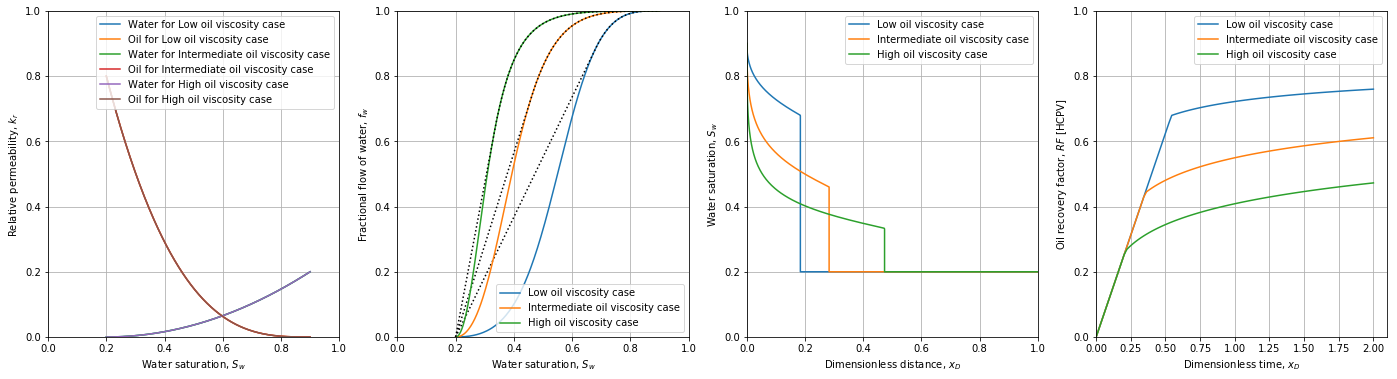

In [5]:
d_core = {'Swc':0.2, 'Sor':0.1, 'krw0':0.2, 'kro0':0.8, 'nw':2, 'no':3}
d_f1 = {'muw':0.5, 'muo':1, 'label':'Low oil viscosity case'}
d_f2 = {'muw':0.5, 'muo':10, 'label':'Intermediate oil viscosity case'}
d_f3 = {'muw':0.5, 'muo':50, 'label':'High oil viscosity case'}

dl = [{**d, **d_core} for d in [d_f1, d_f2, d_f3]]

sensitivity(dl)

流体の粘度の違いにより、フラクショナルフロー関数が異なり、飽和率分布や回収率が異なってくることが分かる。

油（被置換流体）の粘度が高くなる、あるいは水（置換流体）の粘度が低くなると、水のフラクショナル関数は左にシフトし、水が流れやすくなる。この場合、ピストンライクな置換とはならず、ショックフロントが速く進展し、早期のブレークスルーが起こり、回収率は低く推移することになる。

### 濡れ性（相対浸透率）の違い

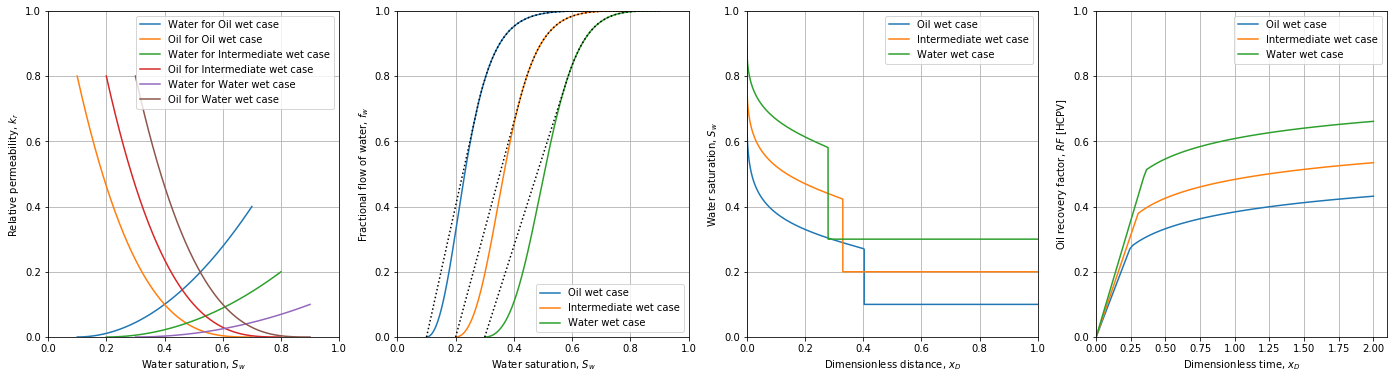

In [6]:
d_core1 = {'Swc':0.1, 'Sor':0.3, 'krw0':0.4, 'kro0':0.8, 'nw':2, 'no':3, 'label':'Oil wet case'}
d_core2 = {'Swc':0.2, 'Sor':0.2, 'krw0':0.2, 'kro0':0.8, 'nw':2, 'no':3, 'label':'Intermediate wet case'}
d_core3 = {'Swc':0.3, 'Sor':0.1, 'krw0':0.1, 'kro0':0.8, 'nw':2, 'no':3, 'label':'Water wet case'}
d_f = {'muw':0.5, 'muo':10}

dl = [{**d_f, **d} for d in [d_core1, d_core2, d_core3]]

sensitivity(dl)

岩石の濡れ性の違いにより、油の回収挙動が変化する。Oil wetな場合、ショックフロントが速く進展し、早期にブレークスルーが起こり、回収率が低い。一方、水濡れの場合、比較的ピストンライクな置換が起こり、ブレークスルーが遅く、油の回収率も高くなる。

*End of notebook...*